# 🧠 Clasificación de Usuarios con SVM, Árbol de Decisión y Random Forest
Proyecto de detección de patrones en datos de comportamiento de usuarios usando modelos supervisados.
Dataset: Social_Network_Ads.csv

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [19]:
pip install scikit-learn


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 4.5 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.0 MB 5.4 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.0 MB 5.5 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.0 MB 5.6 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/8.0 MB 5.5 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.0 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 5.5 MB/s  0:00:01
   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
   - -------------------------------------- 1.0/36.3 MB 6.6 MB/s eta 0:00:06
   - -------------------------------------- 1.3/36.3 MB 5.9 MB/s eta 0:00:06
   - -------------------------------------- 1.3/36.3 MB 5.9 MB/s eta 0:00:06
   - ---------------------------

In [42]:
# Cargar datos
df = pd.read_csv('Social_Network_Ads.csv')
df.drop(columns=['User ID'], inplace=True)
df.head()


,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


## 🔍 Análisis Exploratorio de Datos (EDA)

              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000

Distribución de clases:
Purchased
0    257
1    143
Name: count, dtype: int64


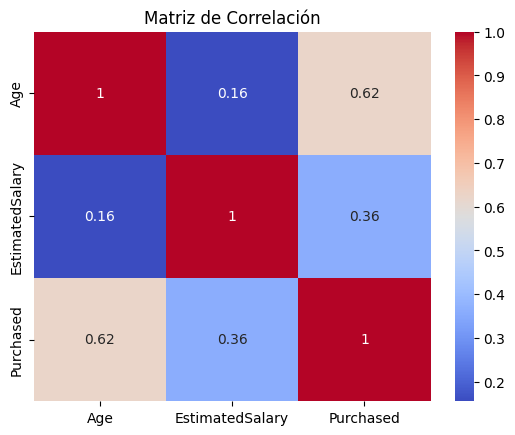

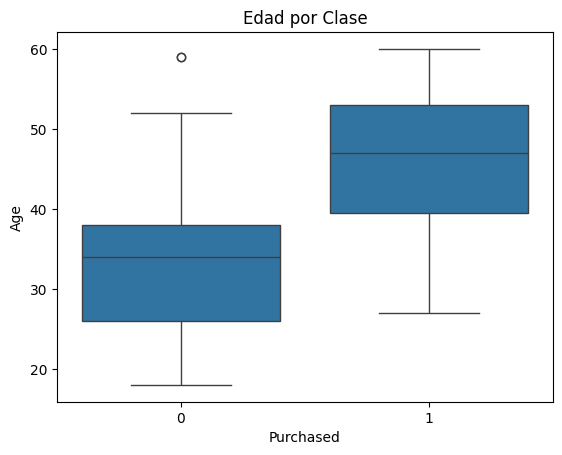

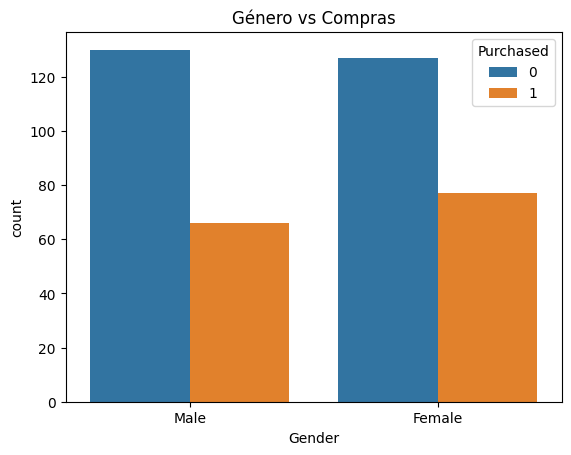

In [43]:
# Descripción de variables
print(df.describe())
print('\nDistribución de clases:')
print(df['Purchased'].value_counts())

# Visualizaciones
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

sns.boxplot(x='Purchased', y='Age', data=df)
plt.title('Edad por Clase')
plt.show()

sns.countplot(x='Gender', hue='Purchased', data=df)
plt.title('Género vs Compras')
plt.show()

## ⚙️ Preprocesamiento

In [45]:
# Codificación y escalado
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)
X = df_encoded.drop('Purchased', axis=1)
y = df_encoded['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🤖 Entrenamiento y Evaluación de Modelos


📌 Modelo: Árbol de Decisión
[[45  7]
 [ 7 21]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        52
           1       0.75      0.75      0.75        28

    accuracy                           0.82        80
   macro avg       0.81      0.81      0.81        80
weighted avg       0.82      0.82      0.82        80



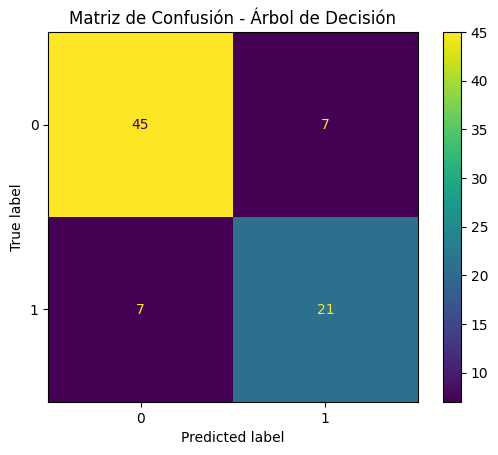


📌 Modelo: SVM
[[48  4]
 [ 2 26]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



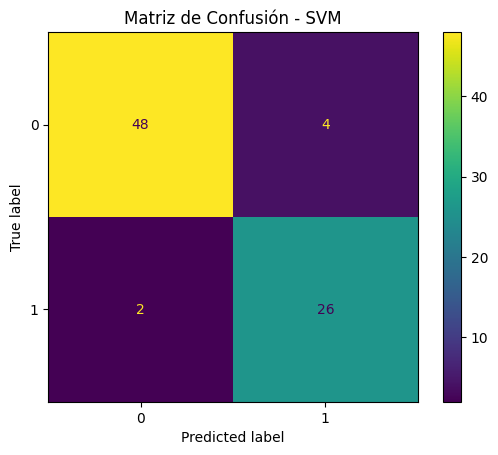


📌 Modelo: Random Forest
[[47  5]
 [ 5 23]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        52
           1       0.82      0.82      0.82        28

    accuracy                           0.88        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.88      0.88      0.88        80



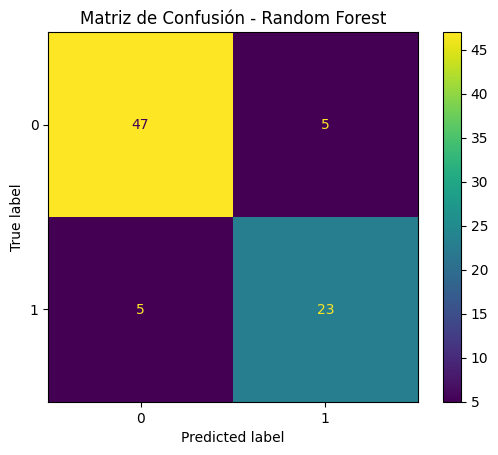

In [46]:
models = {
    'Árbol de Decisión': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', C=1.0, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n📌 Modelo: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()